<a href="https://colab.research.google.com/github/khalidme94/ML/blob/CH_6/Khalid_Almalki_Lieaner_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Assignment

Note: target variable is `total_amount`.


1. Load in a sample of the NYC taxi dataset through this parquet link: `https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_parquet('https://github.com/gumdropsteve/datasets/raw/master/nyc_taxi/yellow_tripdata_2019-12.parquet')

2. Find out some information about the data...

In [3]:
df.describe

<bound method NDFrame.describe of         VendorID tpep_pickup_datetime  ... total_amount  congestion_surcharge
0            1.0  2019-12-21 07:55:21  ...         9.80                   2.5
1            1.0  2019-12-08 13:20:45  ...        13.30                   2.5
2            2.0  2019-12-28 14:41:40  ...        11.30                   2.5
3            2.0  2019-12-05 23:42:35  ...        21.96                   2.5
4            1.0  2019-12-13 12:30:25  ...        17.80                   2.5
...          ...                  ...  ...          ...                   ...
482737       1.0  2019-12-12 15:22:02  ...         5.75                   0.0
482738       1.0  2019-12-28 18:36:46  ...        11.30                   2.5
482739       1.0  2019-12-07 19:58:00  ...        18.95                   2.5
482740       2.0  2019-12-14 12:27:36  ...        26.16                   2.5
482741       1.0  2019-12-24 22:50:46  ...         9.80                   2.5

[482742 rows x 18 columns]>

In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [5]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
470340,1.0,2019-12-28 23:18:07,2019-12-28 23:25:23,1.0,1.50,1.0,N,161,113,1.0,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5
295686,2.0,2019-12-04 21:08:29,2019-12-04 21:21:55,2.0,1.69,1.0,N,186,162,1.0,10.0,0.5,0.5,2.76,0.0,0.3,16.56,2.5
50510,2.0,2019-12-20 10:32:17,2019-12-20 10:47:22,1.0,1.34,1.0,N,107,90,1.0,10.5,0.0,0.5,3.45,0.0,0.3,17.25,2.5
362116,2.0,2019-12-21 01:10:01,2019-12-21 01:21:20,1.0,3.64,1.0,N,161,41,2.0,12.5,0.5,0.5,0.00,0.0,0.3,16.30,2.5
301425,2.0,2019-12-19 15:48:07,2019-12-19 15:55:57,2.0,1.25,1.0,N,237,236,1.0,7.0,0.0,0.5,1.00,0.0,0.3,11.30,2.5


3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualization(s) (of your choice)

In [6]:
corr=df.corr()
corr

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


I tried the 'pairplot' below but it does not work!

In [7]:
# sns.pairplot(df)


Here I am using two charts, one I got it from the internet and the another one from what I learnt in the leacture

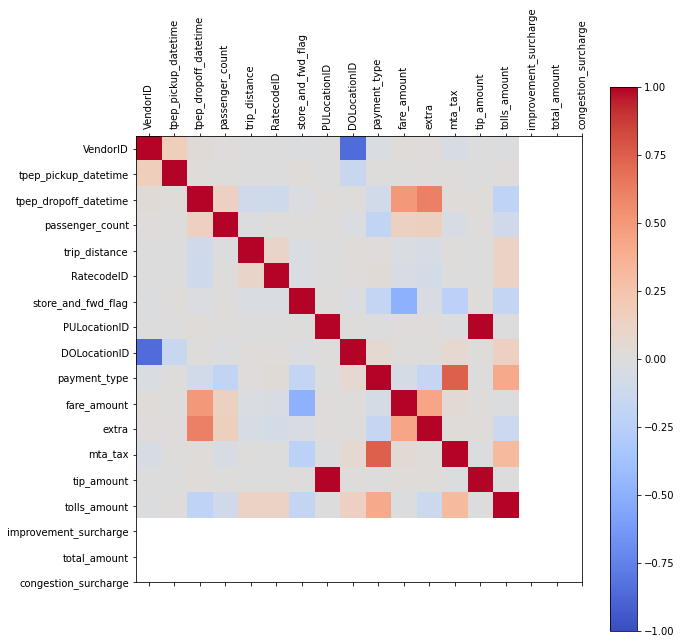

In [8]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [9]:
corr.style.background_gradient(cmap='coolwarm')

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,1.000000,0.165798,0.025826,0.009225,-0.006963,-0.002515,-0.012707,-0.001725,-0.858735,-0.028355,0.021642,0.010144,-0.039408,-0.001597,-0.009748
passenger_count,0.165798,1.000000,0.019496,0.000271,-0.006724,-0.004947,0.016564,-0.000294,-0.135692,0.002063,0.000780,0.012475,0.003783,-0.000227,0.013716
trip_distance,0.025826,0.019496,1.000000,0.144107,-0.094794,-0.107132,-0.020566,0.017491,0.001632,-0.085268,0.506991,0.615388,0.018388,0.021689,-0.210402
RatecodeID,0.009225,0.000271,0.144107,1.000000,-0.008881,0.002503,0.006139,0.004868,-0.022093,-0.181959,0.133305,0.155296,-0.039509,0.005854,-0.094704
PULocationID,-0.006963,-0.006724,-0.094794,-0.008881,1.000000,0.107039,-0.028173,-0.000217,0.015927,0.010784,-0.027828,-0.049324,0.002824,-0.000370,0.127982
DOLocationID,-0.002515,-0.004947,-0.107132,0.002503,0.107039,1.000000,-0.029818,-0.000392,0.014882,0.028633,-0.034075,-0.065728,-0.000009,-0.000616,0.129009
payment_type,-0.012707,0.016564,-0.020566,0.006139,-0.028173,-0.029818,1.000000,0.006944,-0.021476,-0.178163,-0.484442,-0.033897,-0.221938,0.004156,-0.175131
fare_amount,-0.001725,-0.000294,0.017491,0.004868,-0.000217,-0.000392,0.006944,1.000000,0.001580,-0.006006,0.010816,0.012652,-0.010373,0.999976,-0.004353
extra,-0.858735,-0.135692,0.001632,-0.022093,0.015927,0.014882,-0.021476,0.001580,1.000000,0.063720,0.002841,0.002643,0.064156,0.002209,0.147109
mta_tax,-0.028355,0.002063,-0.085268,-0.181959,0.010784,0.028633,-0.178163,-0.006006,0.063720,1.000000,-0.060702,-0.168105,0.744811,-0.006107,0.409854


4. Split your data into training and testing datasets...

In [10]:
# X=df.drop(['tpep_pickup_datetime','tpep_dropoff_datetime','total_amount'],axis=1)
col=['fare_amount']
X=df[col]
y=df['total_amount']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=2)

In [11]:
X_train.shape

(362056, 1)

In [12]:
y_train.shape

(362056,)

In [13]:
X_test.shape

(120686, 1)

In [14]:
y_test.shape

(120686,)

5. Import, create, and fit a LinearRegression model with 1 variable

In [15]:
lr= LinearRegression(fit_intercept=True,
                     normalize=False)

In [16]:
lr.fit(pd.DataFrame(X_train), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

6. Make predictions on your `X_test` values...

In [17]:
pred=lr.predict(pd.DataFrame(X_test))

In [18]:
# what do they look like? (show me some of the predictions)
pred

array([10.55339601, 15.05367936, 58.05638698, ..., 18.55389975,
       12.55352194, 18.55389975])

7. Score your model...
- r2_score
- other metric (of your choice...)

In [19]:
r2_score(y_test,pred)

0.9316024197163262

In [20]:
mean_squared_error(y_test,pred)

16.15802841917138

8. Create, and fit a LinearRegression model with **more than** 1 variable

In [21]:
col=['fare_amount','trip_distance']
X=df[col]
y=df['total_amount']

X_train,  X_test, y_train, y_test = train_test_split(X,y,train_size=0.75, random_state=2)

In [22]:
lr.fit(pd.DataFrame(X_train), y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

9. Make predictions on your `X_test` values...

In [23]:
pred=lr.predict(pd.DataFrame(X_test))
pred

array([ 9.03709026, 14.02706162, 67.88552435, ..., 18.54369791,
       11.40455599, 17.41686003])

In [24]:
# what do they look like? (show me some of the predictions)


10. Score your model...
- r2_score
- other metric (of your choice...)

In [25]:
r2_score(y_test,pred)

0.9563076052968995

In [26]:
mean_squared_error(y_test,pred)

10.321753377624457

In [27]:
10.321753377624457-10.321753377624457

0.0

11. Which model is better? Why?

The second model is better as it has the higher r2 score with 0.956 unlike the first one which had around 0.932.
However both of them have the same mean squared error score

12. Perform GridSearchCV with the better data

In [28]:
p_grid = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(lr, p_grid)

In [29]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
grid.best_params_

{'fit_intercept': True, 'normalize': True}

13. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [31]:


lr = LinearRegression(fit_intercept=True,
                      normalize=True)



In [32]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [33]:
preds = lr.predict(X_test)

14. Score the new model... 
- r2_score
- some other metric of your choice

In [34]:
r2_score(y_test,pred)

0.9563076052968995

In [35]:
mean_squared_error(y_test,pred)

10.321753377624457

In [36]:
10.321753377624457-10.321753377624457

0.0

In [37]:
0.9563076052968995-0.9563076052968995

0.0

Did the score change at all? Why?

No, both scores are the same as the previous one